# The MNIST database

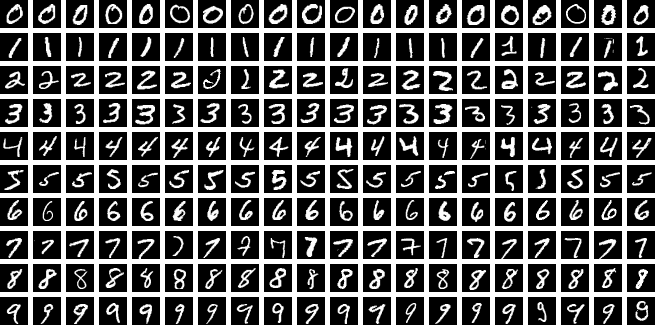

---

Imports

In [4]:
import gzip
import os
from os.path import isfile, join
import numpy as np

Path to the raw data

In [5]:
mnist_raw_path = './raw/'

## Functions

In [6]:
def list_files(mnist_raw_path):
    return [os.path.join(mnist_raw_path, f) for f in os.listdir(mnist_raw_path) if isfile(os.path.join(mnist_raw_path, f))]

### Lists files

In [7]:
for f in list_files(mnist_raw_path):
    print(f)

./raw/train-labels-idx1-ubyte.gz
./raw/train-images-idx3-ubyte.gz
./raw/t10k-images-idx3-ubyte.gz
./raw/t10k-labels-idx1-ubyte.gz


## MNIST Dataset Format Explanation

The MNIST dataset is a collection of handwritten digits that is widely used for training various image processing and machine learning models. It consists of a training set with 60,000 images and a test set with 10,000 images, each accompanied by corresponding labels.

#### Files in the MNIST Dataset

There are four primary files:

1. **train-images-idx3-ubyte**: Contains the training images.
2. **train-labels-idx1-ubyte**: Contains the labels for the training images.
3. **t10k-images-idx3-ubyte**: Contains the test images.
4. **t10k-labels-idx1-ubyte**: Contains the labels for the test images.

#### Format of the Files

##### Image Files (`*-images-idx3-ubyte`)

The image files follow this structure:

1. **Magic Number (4 bytes)**  
   - A fixed integer with the value `2051` (in hexadecimal: `0x00000803`) that identifies the file type.

2. **Number of Images (4 bytes)**  
   - An integer indicating how many images are stored in the file (e.g., 60,000 for the training set).

3. **Number of Rows (4 bytes)**  
   - An integer representing the height of each image. For MNIST, this is typically `28`.

4. **Number of Columns (4 bytes)**  
   - An integer representing the width of each image. For MNIST, this is typically `28`.

5. **Image Data**  
   - The remaining bytes consist of the pixel values for each image.  
   - Pixels are stored in row-major order (i.e., row by row), and each pixel is represented by an unsigned byte (0–255) corresponding to the grayscale intensity.

### Label Files (`*-labels-idx1-ubyte`)

The label files have the following structure:

1. **Magic Number (4 bytes)**  
   - A fixed integer with the value `2049` (in hexadecimal: `0x00000801`) that identifies the file as containing labels.

2. **Number of Labels (4 bytes)**  
   - An integer indicating the number of labels. This number should match the number of images in the corresponding image file.

3. **Label Data**  
   - The subsequent bytes represent the labels, with each label stored as a single byte.  
   - Each label is a digit (0–9) that corresponds to the digit depicted in the associated image.

###Ç# Additional Information

- **Endianness:**  
  All integers in the MNIST dataset files are stored in **big-endian** format. When reading the data, ensure you interpret the multi-byte integers using this byte order.

- **Using the Dataset:**  
  Although you can manually parse these files using programming languages like Python (with libraries such as `struct` and `numpy`), many popular machine learning frameworks (e.g., TensorFlow and Keras) offer built-in functions to load the MNIST dataset, simplifying the process.


## Function get_images

In [8]:
def get_images(mnist_raw_path):
    for f in list_files(mnist_raw_path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), byteorder='big')
                num_images = int.from_bytes(data.read(4), byteorder='big')
                rows = int.from_bytes(data.read(4), byteorder='big')
                cols = int.from_bytes(data.read(4), byteorder='big')
                
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape(num_images, rows, cols)
    
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
                
        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), byteorder='big')
                num_images = int.from_bytes(data.read(4), byteorder='big')
                rows = int.from_bytes(data.read(4), byteorder='big')
                cols = int.from_bytes(data.read(4), byteorder='big')
                
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape(num_images, rows, cols)
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)

    return x_train, y_train, x_test, y_test

In [9]:
x_train, y_train, x_test, y_test = get_images(mnist_raw_path)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Test

In [17]:
from jupyterthemes import jtplot
jtplot.style(grid=False)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap("gray"))
    plt.axis('off')

The imagen showed is:  3


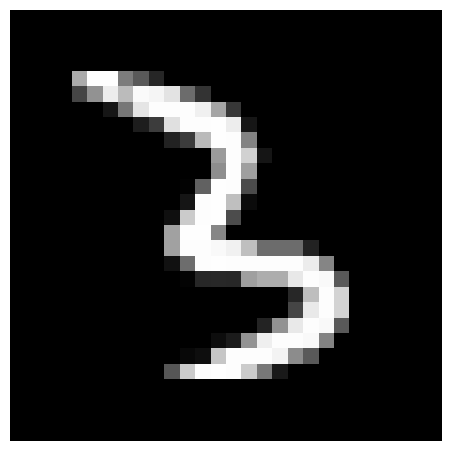

In [45]:
rand_idx = np.random.randint(len(y_train))
print("The imagen showed is: ", y_train[rand_idx])
plot_number(x_train[rand_idx])

The imagen showed is:  2


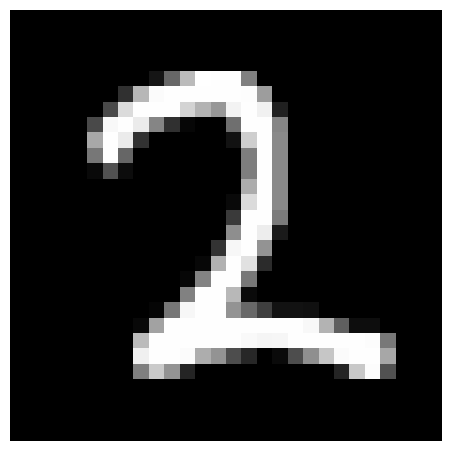

In [49]:
rand_idx = np.random.randint(len(y_test))
print("The imagen showed is: ", y_test[rand_idx])
plot_number(x_test[rand_idx])